<a href="https://colab.research.google.com/github/mia-netizen/bigdata/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(SportsAnalytics)

In [6]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



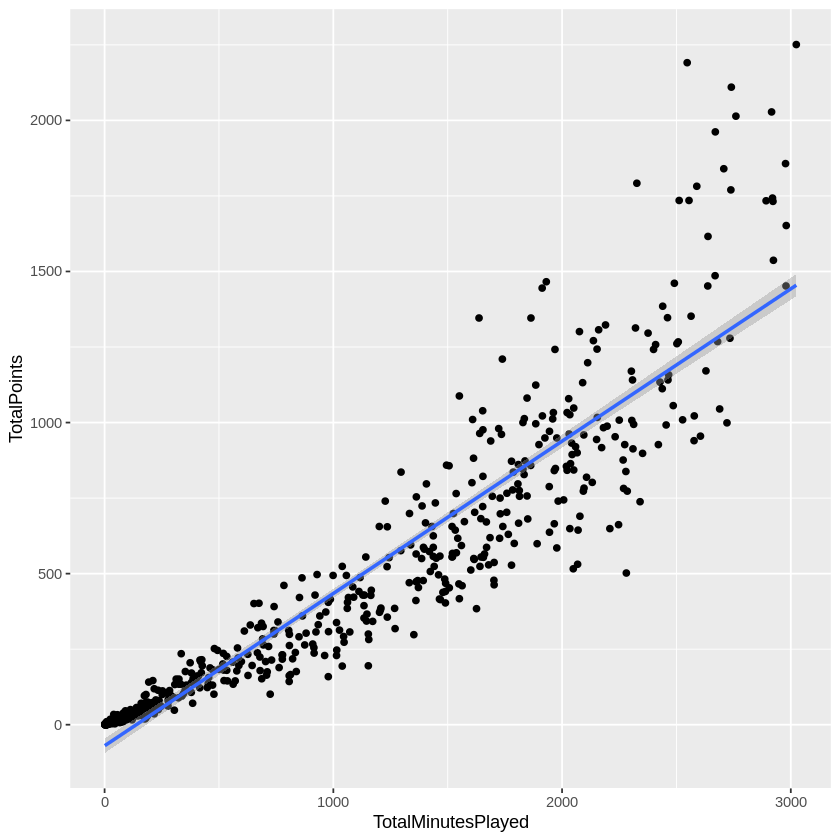

In [8]:
#線性迴歸
NBA1718 <- fetch_NBAPlayerStatistics("17-18")
ggplot(NBA1718,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")

In [9]:
lm(TotalPoints~TotalMinutesPlayed,data=NBA1718)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  


In [10]:
#多變量線性迴歸
glm(TotalPoints~TotalMinutesPlayed,data=NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA1718)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -69.7978              0.5041  

Degrees of Freedom: 539 Total (i.e. Null);  538 Residual
Null Deviance:	    117600000 
Residual Deviance: 16920000 	AIC: 7129

In [13]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data=NBA1718)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA1718)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           29.02535             -0.01681              1.31181  
         PositionPF           PositionPG           PositionSF  
          -29.81577            -57.56647            -39.12716  
         PositionSG  
          -58.55942  

Degrees of Freedom: 538 Total (i.e. Null);  532 Residual
  (1 observation deleted due to missingness)
Null Deviance:	    117300000 
Residual Deviance: 1963000 	AIC: 5966

羅吉斯迴歸

In [14]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")

In [15]:
head(mydata)

,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [18]:
mydata$rank <- factor(mydata$rank)
mylogit <- glm(admit~gre+gpa+rank,data=mydata,family="binomial")
sum<-summary(mylogit)
sum$coefficients 

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


決策樹

In [19]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
library(rpart)

In [24]:
DT<- rpart(Position~Blocks+ThreesMade+Assists+Steals,data=NBA1718)
DT

n=539 (1 observation deleted due to missingness)

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 539 398 SG (0.14 0.21 0.2 0.19 0.26)  
    2) Blocks>=36.5 108  68 C (0.37 0.29 0.037 0.23 0.074)  
      4) ThreesMade< 6 35   8 C (0.77 0.17 0 0.057 0) *
      5) ThreesMade>=6 73  48 PF (0.18 0.34 0.055 0.32 0.11)  
       10) Assists< 159.5 40  19 PF (0.12 0.53 0 0.33 0.025)  
         20) Steals< 64 33  13 PF (0.15 0.61 0 0.21 0.03) *
         21) Steals>=64 7   1 SF (0 0.14 0 0.86 0) *
       11) Assists>=159.5 33  23 SF (0.24 0.12 0.12 0.3 0.21)  
         22) Blocks>=60.5 15   7 C (0.53 0.13 0.067 0.2 0.067) *
         23) Blocks< 60.5 18  11 SF (0 0.11 0.17 0.39 0.33) *
    3) Blocks< 36.5 431 298 SG (0.086 0.19 0.24 0.18 0.31)  
      6) Assists< 151.5 337 238 SG (0.11 0.23 0.16 0.21 0.29)  
       12) ThreesMade< 2.5 113  79 PF (0.27 0.3 0.13 0.13 0.17)  
         24) Blocks>=1.5 49  24 C (0.51 0.35 0.041 0.041 0.061) *
         25) Blocks< 1.5 64  

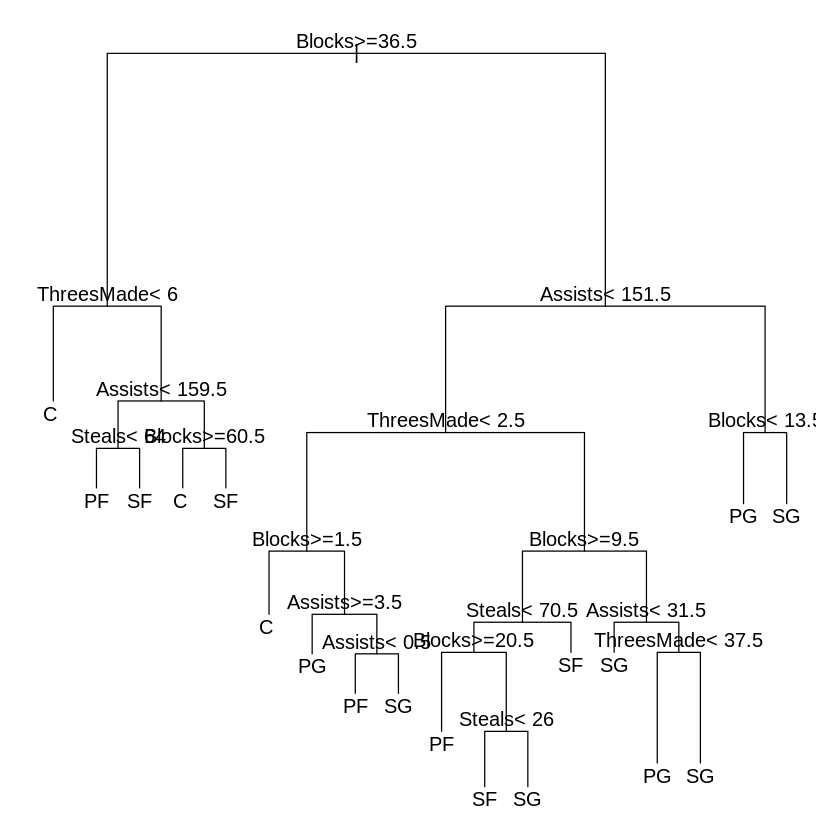

In [25]:
par(mfrow = c(1,1),mar=rep(1,4))
plot(DT)
text(DT,use.n=F,all=F,cex=1)

In [26]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



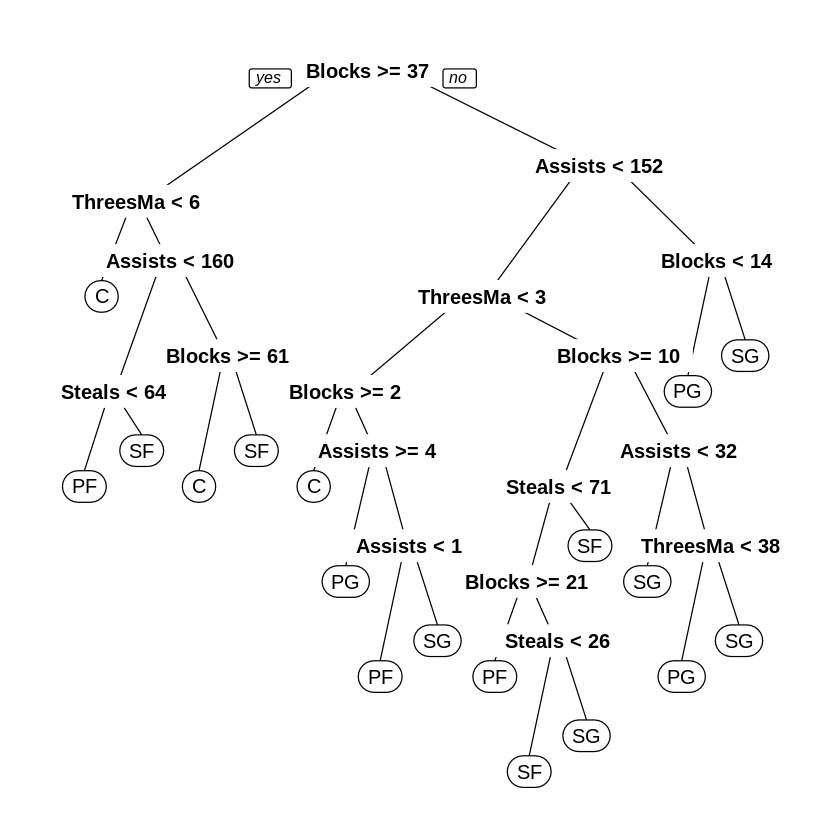

In [29]:
library(rpart.plot)
prp(DT)

In [30]:
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [49]:
install.packages("datasets")
library(datasets)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [50]:
data(Groceries)
Groceries@data@Dim

[1]  169 9835

In [51]:
#關聯式規則
rules<-apriori(Groceries,parameter = list(supp=0.001,conf=0.8),control=list(verbose=F))
options(digits=2)
inspect(rules[1:5])

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [52]:
#按照confidence排序
rules<-sort(rules,by="confidence",decreasing = TRUE)
#前5
inspect(rules[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [53]:
rules<-sort(rules,by="confidence",decreasing = TRUE)
inspect(rules[1:10])

     lhs                     rhs                support confidence coverage lift count
[1]  {rice,                                                                           
      sugar}              => {whole milk}        0.0012          1   0.0012  3.9    12
[2]  {canned fish,                                                                    
      hygiene articles}   => {whole milk}        0.0011          1   0.0011  3.9    11
[3]  {root vegetables,                                                                
      butter,                                                                         
      rice}               => {whole milk}        0.0010          1   0.0010  3.9    10
[4]  {root vegetables,                                                                
      whipped/sour cream,                                                             
      flour}              => {whole milk}        0.0017          1   0.0017  3.9    17
[5]  {butter,                              

In [68]:
#牛奶
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.08),
appearance=list(default="lhs",rhs="whole milk"),
control=list(verbose=F))
rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [69]:
#麥片
rulesR<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.010),
appearance=list(default="lhs",rhs="cereals"),
control=list(verbose=F))
rulesR<-sort(rulesR,decreasing = TRUE,by="confidence")
inspect(rulesR[1:5])

    lhs                              rhs       support confidence coverage lift
[1] {whole milk,curd}             => {cereals} 0.0010  0.039      0.026    6.8 
[2] {whole milk,yogurt}           => {cereals} 0.0017  0.031      0.056    5.4 
[3] {curd}                        => {cereals} 0.0011  0.021      0.053    3.7 
[4] {root vegetables,whole milk}  => {cereals} 0.0010  0.021      0.049    3.7 
[5] {other vegetables,whole milk} => {cereals} 0.0013  0.018      0.075    3.1 
    count
[1] 10   
[2] 17   
[3] 11   
[4] 10   
[5] 13   


In [56]:
#牛奶
rulesL<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
appearance=list(default="rhs",lhs="whole milk"),
control=list(verbose=F))
rulesL<-sort(rulesL,decreasing = TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [61]:
#奶油
rulesL<-apriori(data=Groceries,parameter=list(supp=0.001,conf=0.15,minlen=2),
appearance=list(default="rhs",lhs="butter"),
control=list(verbose=F))
rulesL<-sort(rulesL,decreasing = TRUE,by="confidence")
inspect(rulesL[1:5])

    lhs         rhs                support confidence coverage lift count
[1] {butter} => {whole milk}       0.028   0.50       0.055    1.9  271  
[2] {butter} => {other vegetables} 0.020   0.36       0.055    1.9  197  
[3] {butter} => {yogurt}           0.015   0.26       0.055    1.9  144  
[4] {butter} => {rolls/buns}       0.013   0.24       0.055    1.3  132  
[5] {butter} => {root vegetables}  0.013   0.23       0.055    2.1  127  


0518作業

In [70]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [71]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [72]:
library(SportsAnalytics)

In [73]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



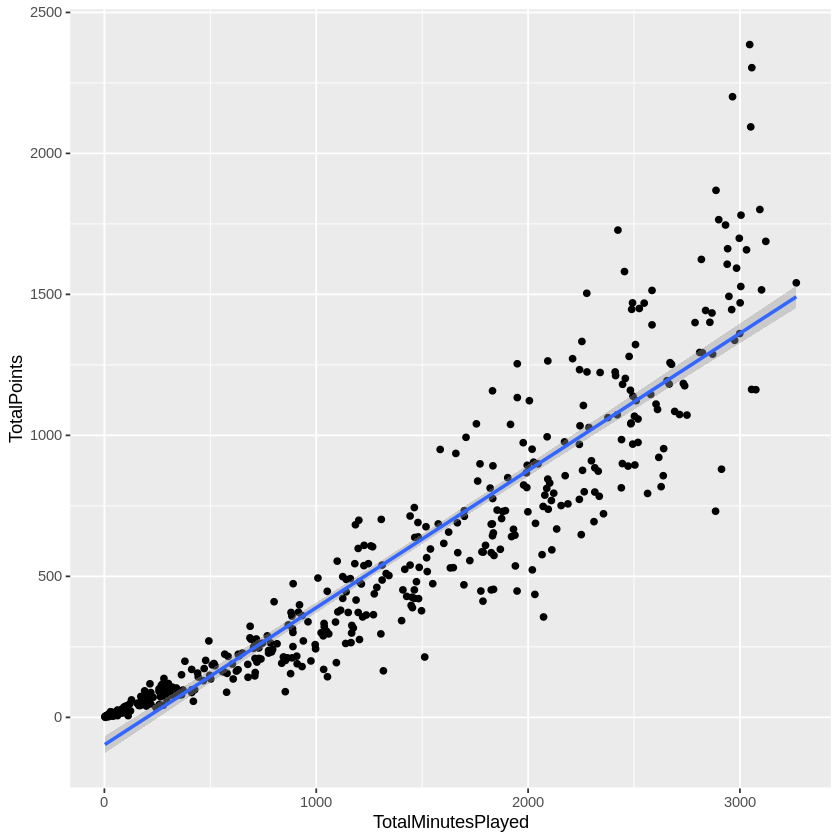

In [75]:
NBA0809 <- fetch_NBAPlayerStatistics("08-09")
ggplot(NBA0809,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method="glm")

In [76]:
lm(TotalPoints~TotalMinutesPlayed,data=NBA0809)


Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA0809)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -97.343               0.486  


In [77]:
glm(TotalPoints~TotalMinutesPlayed,data=NBA0809)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed, data = NBA0809)

Coefficients:
       (Intercept)  TotalMinutesPlayed  
           -97.343               0.486  

Degrees of Freedom: 444 Total (i.e. Null);  443 Residual
Null Deviance:	    1.1e+08 
Residual Deviance: 1.5e+07 	AIC: 5920

In [78]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data=NBA0809)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = NBA0809)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
            2.97472              0.00541              1.28092  
         PositionPF           PositionPG           PositionSF  
          -23.17770            -52.31390            -40.32046  
         PositionSG  
          -40.78081  

Degrees of Freedom: 442 Total (i.e. Null);  436 Residual
  (2 observations deleted due to missingness)
Null Deviance:	    1.1e+08 
Residual Deviance: 1880000 	AIC: 4970